In [ ]:
from pybacktest.backtest import Backtest
from pybacktest.strategy import StrategyWrapper, StrategyManager
from pybacktest.models import Stock

start = '2024-01-01'
end = '2024-12-31'
apple = Stock("AAPL", start, end)
tqqq = Stock("TQQQ", start, end)
strategy_json = {
    "AAPL": {
        "buy": {
            "ticker": "AAPL",
            "by": ["current", "Change_Pct"],
            "period": False,
            "criteria": ["percent-change", 0.5],
            "quantity": ["count", 10]
        },
        "sell": {
            "ticker": "AAPL",
            "by": ["current", "Close"],
            "period": False,
            "criteria": ["profit-rate", 10],
            "quantity": ["percent", 100]
        }
    },
    "TQQQ": {
        "buy": {
            "ticker": "TQQQ",
            "by": ["average", "Close"],
            "period": 3,
            "criteria": ["point", 0.05],
            "quantity": ["value", 1000]
        },
        "sell": {
            "ticker": "AAPL",
            "by": ["current", "Change_Pct"],
            "period": False,
            "criteria": ["percent-change", -3],
            "quantity":["percent", 50]
        }
    }
}
strategy = StrategyManager("st1", StrategyWrapper(**strategy_json))

backtest = Backtest([apple, tqqq], [strategy], 100000)

In [2]:
backtest.run()

Start Runing Backtest!
Ended Running Backtest!


/Users/sciencemj/Desktop/Python/pybacktest/src/pybacktest_sciencemj/backtest.py:87: UserWarning: Not enough money to buy 33 shares of TQQQ at 29.775650024414062 on 2024-05-14 00:00:00! Check your strategy.(This can be caused by buying multiple stocks in one day.)
  warnings.warn(f"Not enough money to buy {action.quantity} shares of {action.ticker} at {action.price} on {date}! Check your strategy.(This can be caused by buying multiple stocks in one day.)")


In [3]:
backtest.portfolio.cash

29521.930267333984

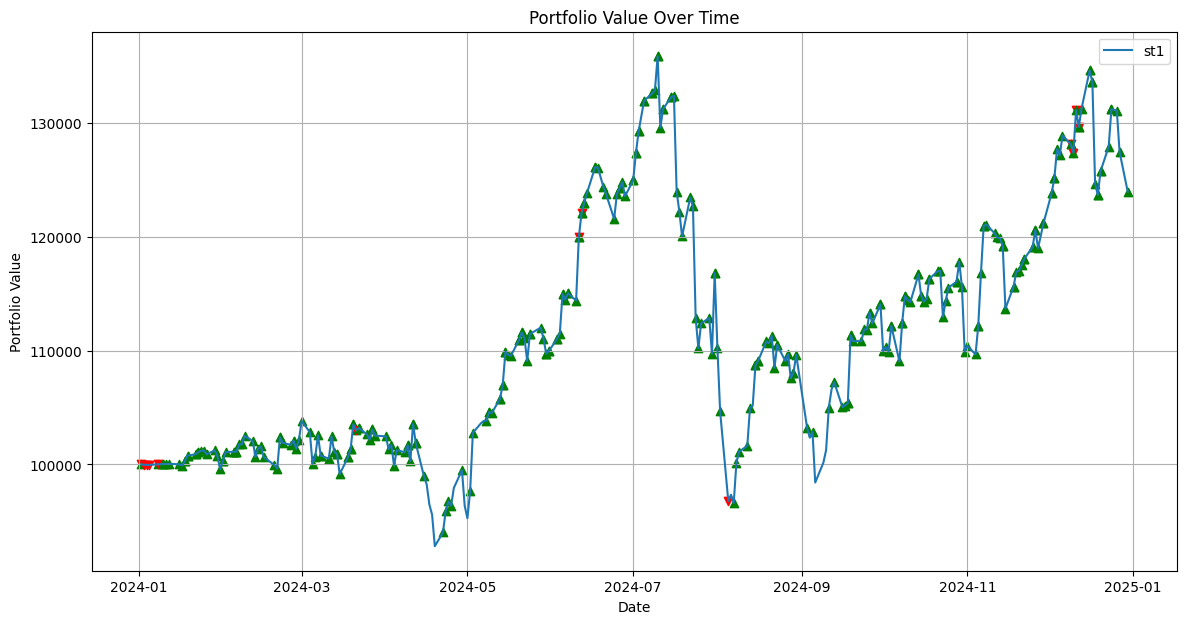

In [4]:
backtest.plot_performance()